In [123]:
import pandas as pd

y1 = pd.read_csv("yelp_review_rest.csv")
y2 = pd.read_csv("yelp_review_rest(1).csv")
y3 = pd.read_csv("yelp_review_rest(2).csv")

y_review = pd.concat((y1,y2),axis=0)

del y1, y2

y_review = pd.concat((y_review,y3),axis=0)

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [276]:
y_review.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool,year
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5.0,2016-05-28,Super simple place but amazing nonetheless. It...,0.0,0.0,0.0,2016
1,1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5.0,2016-05-28,Small unassuming place that changes their menu...,0.0,0.0,0.0,2016
2,2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5.0,2016-05-28,Lester's is located in a beautiful neighborhoo...,0.0,0.0,0.0,2016
3,3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4.0,2016-05-28,Love coming here. Yes the place always needs t...,0.0,0.0,0.0,2016
4,4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4.0,2016-05-28,Had their chocolate almond croissant and it wa...,0.0,0.0,0.0,2016


In [124]:
from datetime import datetime
from dateutil.parser import parse
from pandas import Series
from datetime import timedelta


y_review['date'] = pd.to_datetime(y_review["date"], infer_datetime_format=True)

In [125]:
y_rest = pd.read_csv("yelp_rest.csv")
y_rest = y_rest[y_rest["review_count"]>4]

In [128]:
y_review = y_review[y_review["business_id"].isin(list(y_rest["business_id"].values))]
len(y_review["business_id"].unique())

46488

In [129]:
y_review["year"] = y_review['date'].dt.year

In [149]:
unique_bf14 = y_review[y_review["year"]<2014]["business_id"].unique()
unique_af13 = y_review[y_review["year"]>2014]["business_id"].unique()

In [ ]:
#

In [130]:
y_review["year"].value_counts()

2017    663689
2016    628713
2015    557324
2014    418219
2013    289024
2012    217953
2011    184014
2010    119080
2009     63128
2008     35456
2007     13325
2006      3435
2005       502
2004        10
Name: year, dtype: int64

In [122]:
y_review.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
1,5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
3,14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Uptown,"""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,Restaurants;American (Traditional)
4,15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Yonge and Eglinton,"""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,Italian;French;Restaurants
5,19,Gu-xs3NIQTj3Mj2xYoN2aw,"""Maxim Bakery & Restaurant""",NaN,"""9665 Bayview Avenue, Unit 1-4""",Richmond Hill,ON,L4C 9V4,43.867565,-79.412662,3.5,34,1,French;Food;Bakeries;Restaurants


In [1]:
# del y3

# len(y_review)

# y_tip = pd.read_csv("yelp_tip_rest.csv")

y_buss = pd.read_csv("yelp_buss_rest.csv")

from nltk import NaiveBayesClassifier, classify
import name_loader as name_loader
import random


class genderPredictor():

    def getFeatures(self):
        maleNames, femaleNames = self._loadNames()

        featureset = list()

        for nameTuple in maleNames:
            features = self._nameFeatures(nameTuple[0])
            male_prob, female_prob = self._getProbDistr(nameTuple)
            features['male_prob'] = male_prob
            features['female_prob'] = female_prob
            featureset.append((features, 'M'))

        for nameTuple in femaleNames:
            features = self._nameFeatures(nameTuple[0])
            male_prob, female_prob = self._getProbDistr(nameTuple)
            features['male_prob'] = male_prob
            features['female_prob'] = female_prob
            featureset.append((features, 'F'))

        return featureset

    def trainAndTest(self, trainingPercent=0.80):
        featureset = self.getFeatures()
        random.shuffle(featureset)

        name_count = len(featureset)

        cut_point = int(name_count * trainingPercent)

        train_set = featureset[:cut_point]
        test_set = featureset[cut_point:]

        self.train(train_set)

        return self.test(test_set)

    def classify(self, name):
        feats = self._nameFeatures(name)
        return self.classifier.classify(feats)

    def train(self, train_set):
        self.classifier = NaiveBayesClassifier.train(train_set)
        return self.classifier

    def test(self, test_set):
        return classify.accuracy(self.classifier, test_set)

    def _getProbDistr(self, nameTuple):
        male_prob = (nameTuple[1] * 1.0) / (nameTuple[1] + nameTuple[2])
        if male_prob == 1.0:
            male_prob = 0.99
        elif male_prob == 0.0:
            male_prob = 0.01
        else:
            pass
        female_prob = 1.0 - male_prob
        return (male_prob, female_prob)

    def getMostInformativeFeatures(self, n=5):
        return self.classifier.most_informative_features(n)

    def _loadNames(self):
        return name_loader.getNameList()

    def _nameFeatures(self, name):
        name = name.upper()
        if len(name) > 2:
            return {
                'last_letter': name[-1],
                'last_two': name[-2:],
                'last_three': name[-3:],
                'last_is_vowel': (name[-1] in 'AEIOUY')
            }
        else:
            return {
                'last_letter': name[0],
                'last_two': name[0],
                'last_three': name[0],
                'last_is_vowel': (name[-1] in 'AEIOUY')
            }


if __name__ == "__main__":
    gp = genderPredictor()
    accuracy = gp.trainAndTest()
    feats = gp.getMostInformativeFeatures(10)
    name = ''

nepali_names.pickle exists, loading data
nepali_names.pickle loaded
888 male names loaded, 3944 female names loaded


In [4]:
import os

pd.set_option("display.max_columns",None)

y_buss = pd.read_csv("yelp_buss_rest.csv")

In [5]:
y_buss.iloc[:,2:] = y_buss.iloc[:,2:].applymap(lambda x: 0 if x=="Na" else 1)
y_buss["convenience_att"] = y_buss.iloc[:,2:].sum(axis=1)

y_buss = y_buss.sort_values("convenience_att",ascending=False)

y_buss = y_buss.fillna(value=0)

In [7]:
y_buss = y_buss[["convenience_att","business_id","WiFi","RestaurantsReservations","OutdoorSeating","RestaurantsDelivery","Caters","BikeParking","NoiseLevel"]]

y_buss.columns  = ["Convenience Level","business_id","Free Wi-Fi","Takes Reservations","Outdoor Seating","Delivery","Caters","Bike Parking","Noisy"]

y_buss["Outdoor Seating"] = y_buss["Outdoor Seating"].replace(['Na','Paid','paid', 'False','no'], 'No')
y_buss["Outdoor Seating"] = y_buss["Outdoor Seating"].replace(['Free','free', 'True',"yes"], 'Yes')

y_buss["Delivery"] = y_buss["Delivery"].replace(['Na','Paid','paid', 'False','no'], 'No')
y_buss["Delivery"] = y_buss["Delivery"].replace(['Free','free', 'True',"yes"], 'Yes')

y_buss["Free Wi-Fi"] = y_buss["Free Wi-Fi"].replace(['Na','Paid','paid', 'False','no'], 'No')
y_buss["Free Wi-Fi"] = y_buss["Free Wi-Fi"].replace(['Free','free', 'True',"yes"], 'Yes')

y_buss["Caters"] = y_buss["Caters"].replace(['Na','Paid','paid', 'False','no'], 'No')
y_buss["Caters"] = y_buss["Caters"].replace(['Free','free', 'True',"yes"], 'Yes')

y_buss["Bike Parking"] = y_buss["Bike Parking"].replace(['Na','Paid','paid', 'False','no'], 'No')
y_buss["Bike Parking"] = y_buss["Bike Parking"].replace(['Free','free', 'True',"yes"], 'Yes')

y_buss["Noisy"] = y_buss["Noisy"].replace(['Na','Paid','paid', 'False','no'], 'No')
y_buss["Noisy"] = y_buss["Noisy"].replace(['Free','free', 'True',"yes"], 'Yes')

y_buss["Takes Reservations"] = y_buss["Takes Reservations"].replace(['Paid','paid', 'False','no'], 'No')
y_buss["Takes Reservations"] = y_buss["Takes Reservations"].replace(['Free','free', 'True',"yes"], 'Yes')

y_buss["Noisy"] = y_buss['Noisy'].replace(['Average', 'Quiet'], 'No')
y_buss["Noisy"] = y_buss["Noisy"].replace(['Loud', 'Very Loud'], 'Yes')

y_buss = y_buss.replace("Na","No")

In [222]:
y_rest_5.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,last_review,closedate_ifclose
0,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,2017-11-20,2017-12-11
1,5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants,2015-11-29,2016-05-27
2,14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Uptown,"""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,Restaurants;American (Traditional),2017-11-06,2017-12-11
3,15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Yonge and Eglinton,"""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,Italian;French;Restaurants,2012-04-15,2012-10-12
4,19,Gu-xs3NIQTj3Mj2xYoN2aw,"""Maxim Bakery & Restaurant""",NaN,"""9665 Bayview Avenue, Unit 1-4""",Richmond Hill,ON,L4C 9V4,43.867565,-79.412662,3.5,34,1,French;Food;Bakeries;Restaurants,2017-12-05,2017-12-11


In [217]:
####  Undo

from datetime import datetime
from dateutil.parser import parse
from pandas import Series
from datetime import timedelta

y_rest = pd.read_csv("yelp_rest.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


y_rest_5 = y_rest[y_rest["review_count"]>4]

In [218]:
# Using only 15% of the data fr expediency
y_rest_5 = y_rest_5.iloc[:int(len(y_rest_5)*1.00),:]

del y_rest

y_review_5 = y_review[y_review["business_id"].isin(list(y_rest_5["business_id"].values))]

y_review_5['date'] = y_review_5['date'].apply(lambda x: parse(x))

## This you do when you want to remove earlier stuff
##y_review_5 = y_review_5[y_review_5["date"]>datetime.strptime('2012-12-11', '%Y-%m-%d')]

y_review_5 = y_review_5.sort_values("date").reset_index(drop=True)

# Because you did not reset index, you can just put it back because
# you simply used the transform tool
y_review_5["diffs"] = y_review_5.groupby("business_id")["date"].transform(Series.diff)

y_review_5["diffs"] = y_review_5["diffs"].dt.days

y_ray = y_review_5.groupby("business_id").tail(1)

#y_ray_90 = y_ray[y_ray["diffs"]<180]

y_ray_90 = y_ray

y_ray_90["closedate_ifclose"] = y_ray_90["date"] + timedelta(180)

y_rest_5 = y_rest_5[y_rest_5["business_id"].isin(list(y_ray_90["business_id"].values))]

y_ray_90["last_review"] = y_ray_90["date"]

y_rest_5 = pd.merge(y_rest_5,y_ray_90[["last_review","closedate_ifclose","business_id"]],on="business_id",how="left")

y_rest_5["closedate_ifclose"] = y_rest_5["closedate_ifclose"].apply(lambda x: datetime.strptime('2017-12-11', '%Y-%m-%d')  if x> datetime.strptime('2017-12-11', '%Y-%m-%d')  else x)

y_rest_5["closedate_ifclose"] = y_rest_5["closedate_ifclose"].apply(lambda x: datetime.strptime('2017-12-11', '%Y-%m-%d')  if x> datetime.strptime('2017-12-11', '%Y-%m-%d')  else x)

y_rest_three = y_rest_5[y_rest_5["last_review"]>datetime.strptime('2014-12-11', '%Y-%m-%d')  ]

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [351]:
y_rest_three["is_open"].value_counts()

1    34577
0     6126
Name: is_open, dtype: int64

In [ ]:
"business_id","closedate_ifclose","is_open"

In [ ]:
y_rest_three["business_id","closedate_ifclose","is_open"]

In [206]:
y_rest_three.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,last_review,closedate_ifclose
0,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,2017-11-20,2017-12-11
1,14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Uptown,"""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,Restaurants;American (Traditional),2017-11-06,2017-12-11
2,19,Gu-xs3NIQTj3Mj2xYoN2aw,"""Maxim Bakery & Restaurant""",NaN,"""9665 Bayview Avenue, Unit 1-4""",Richmond Hill,ON,L4C 9V4,43.867565,-79.412662,3.5,34,1,French;Food;Bakeries;Restaurants,2017-12-05,2017-12-11
3,25,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,3.5,39,1,Tiki Bars;Nightlife;Mexican;Restaurants;Bars,2017-11-28,2017-12-11
4,29,gAy4LYpsScrj8POnCW6btQ,"""Toast Cafe""",NaN,"""2429 Hwy 160 W""",Fort Mill,SC,29708,35.047287,-80.990559,3.5,6,0,Food;American (Traditional);Coffee & Tea;Resta...,2016-05-07,2016-11-03


In [51]:
full_review = pd.read_csv("full_r_new_big.csv")

#full_review = full_review.drop(['Unnamed: 0' , 'review_id' ,'text_clear', 'user_id', 'text',"useful","funny","cool"],axis=1)

full_review = full_review.drop(['Unnamed: 0' , 'review_id' ,'text_clear', 'user_id', 'text'],axis=1)

full_review = full_review.rename(columns={"stars":"rating"})

full_review["gender"] = full_review["gender"].apply(lambda x: 1 if x=="M" else 0)

In [19]:
full_review.hist(column="diffs", bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1186034a8>]],
      dtype=object)

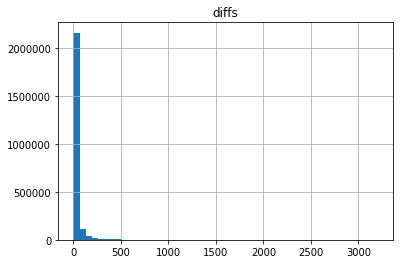

In [20]:
from matplotlib import pyplot as plt
full_review.head()
plt.show()

In [37]:
full_review.head()

,Unnamed: 0.1,business_id,rating,date,useful,funny,cool,diffs,gender,friend_count,photo_count,review_count_usr,name,senti_polarity,review_counter
0,3409268,--6MefnULPED_I942VcFNA,5.0,2008-08-07,8.0,8.0,7.0,NaN,1,2409.0,1832.0,1490.0,Ken,0.020098,37
1,4008759,--6MefnULPED_I942VcFNA,4.0,2010-11-25,4.0,1.0,5.0,840.0,0,32.0,2.0,44.0,Nina,0.298177,37
2,4790377,--6MefnULPED_I942VcFNA,1.0,2010-12-06,6.0,1.0,2.0,11.0,0,0.0,0.0,29.0,Yoga,0.103067,37
3,4139320,--6MefnULPED_I942VcFNA,2.0,2010-12-22,2.0,2.0,2.0,16.0,1,516.0,1138.0,5868.0,Jennifer,-0.019500,37
4,834707,--6MefnULPED_I942VcFNA,3.0,2011-01-08,0.0,0.0,0.0,17.0,1,62.0,2.0,159.0,ness,0.297101,37


In [53]:
full_s.shape

(46488, 16)

In [52]:
### This is ad-hoc to spare time of runing everything againi 
import numpy as np

coli = ["business_id", "useful","funny","cool"]

full_s = full_review[coli].groupby("business_id").agg({np.mean, np.sum, np.std, np.max, np.min}).reset_index()

cols = [ r+"_"+s for r,s in zip(list(full_s.columns.droplevel(1)), list(full_s.columns.droplevel(0)))]

full_s.columns = cols

full_s = full_s.rename(columns={"business_id_":"business_id"})

In [54]:
full_s.head()

,business_id,useful_std,useful_amin,useful_sum,useful_mean,useful_amax,funny_std,funny_amin,funny_sum,funny_mean,funny_amax,cool_std,cool_amin,cool_sum,cool_mean,cool_amax
0,--6MefnULPED_I942VcFNA,2.150145,0.0,50.0,1.351351,8.0,1.647639,0.0,26.0,0.702703,8.0,1.718561,0.0,32.0,0.864865,7.0
1,--9e1ONYQuAa-CB_Rrw7Tw,3.301796,0.0,1554.0,1.070986,72.0,2.262673,0.0,853.0,0.587870,52.0,2.935063,0.0,1034.0,0.712612,68.0
2,--DaPTJW3-tB1vP-PfdTEg,0.613611,0.0,12.0,0.307692,2.0,0.223456,0.0,2.0,0.051282,1.0,0.469013,0.0,5.0,0.128205,2.0
3,--FBCX-N37CMYDfs790Bnw,1.589463,0.0,91.0,0.842593,9.0,1.096069,0.0,47.0,0.435185,7.0,1.097016,0.0,59.0,0.546296,8.0
4,--GM_ORV2cYS-h38DSaCLw,0.534522,0.0,3.0,0.428571,1.0,0.487950,0.0,2.0,0.285714,1.0,0.534522,0.0,3.0,0.428571,1.0


In [239]:
## Rune here

full_review_s = pd.read_csv("full_r_new_s.csv")

full_review_s = full_review_s.drop(full_review_s.filter(regex="Unnamed").columns,axis=1)

full_review_s = pd.merge(full_review_s, full_s, on="business_id", how="left")

full_review_s.shape

#### This might not be necessary if gender was calcualted correctly

full_review_s_g = full_review[["business_id","gender"]].groupby("business_id").agg({np.mean, np.sum, np.std, np.max, np.min}).reset_index()

cols = [ r+"_"+s for r,s in zip(list(full_review_s_g.columns.droplevel(1)), list(full_review_s_g.columns.droplevel(0)))]

full_review_s_g.columns = cols

full_review_s_g = full_review_s_g.rename(columns={"business_id_":"business_id"})

full_review_s_g.columns = ["business_id","gender_std","gender_min","gender_sum","gender_mean","gender_max"]

for col in full_review_s_g.iloc[:,1:]:
    full_review_s[col] = full_review_s_g[col].values

import pandas as pd
y_rest_new = pd.read_csv("y_rest_new.csv")

## Nice so I do have a few things I can work with. 

### You don't have to rerun everything, you do have a big dataset of what you need:
sub = ["latitude","longitude", "state", "reactions_per_week","restaurant_density","restaurant_similar_density","zreview_count_all","zreview_per_week_all","zstar_all","compliment", "elite", "days", "fans"]

y_rest_new = y_rest_new.filter(regex="name|stars|business_id|count_categories|is_open|reviews_per_week|oldest_review|std_of_stars|median_of_stars|stars_linear_coef|is_chain|latitude|longitude|state|reactions_per_week|restaurant_density|restaurant_similar_density|zreview_count_all|zreview_per_week_all|zstar_all|compliment|elite|days|fans")

y_rest_new = y_rest_new.drop(y_rest_new.filter(regex="chain_").columns,axis=1)

y_rest_new = y_rest_new.rename(columns={"stars":"rating_pub"})

y_rest_new.columns

y_rest_new = y_rest_new.set_index("business_id")

full_review_s = full_review_s.set_index("business_id")

##   RUN THIS
#full_review_s = full_review_s.drop(full_review_s.loc[:,"name":"is_chain"].columns,axis=1)
full_review_s = pd.merge(full_review_s,y_rest_new, left_index=True,right_index=True, how="left" )

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,4,5,6,7,8,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [240]:
full_review_s_2 = pd.read_csv("full_r_new_s_FINA.csv")

"Male to Female", "Number of Reviewers"

new = pd.concat((full_review_s_2['Unnamed: 0'],full_review_s_2.loc[:,'Male to Female':'Number of Reviewers']),axis=1)

new = new.set_index("Unnamed: 0")

full_review_s = pd.merge(full_review_s, new, left_index=True,right_index=True,how="left")

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
## Should I be run ? 
###full_review_s =full_review_s.drop(full_review_s.loc[:,"name":"is_chain"],axis=1)

y_buss = y_buss.replace({"No":0,"Yes":1})

y_buss = y_buss.set_index("business_id")

In [241]:
full_review_s = pd.merge(full_review_s, y_buss, left_index=True,right_index=True,how="left")

#full_review_s = full_review_s.drop(full_review_s.loc[:,"Free Wi-Fi": "Noisy"].columns,axis=1)

#del full_review_s["business_id"]

full_review_s["review_count_loc"] = full_review_s["review_counter_max"]
                                                  
full_review_s =  full_review_s.drop(full_review_s.filter(regex="counter").columns,axis=1)                                

full_review_s["friends/review"] = full_review_s["friend_count_sum"]/full_review_s["review_count_usr_sum"]

full_review_s["first_min_last_sent"] = full_review_s["first_sent_sum"]-full_review_s["last_sent_sum"]

full_review_s = full_review_s.drop(full_review_s.filter(regex="Unnamed: 0.1").columns,axis=1)
full_review_s = full_review_s.drop(full_review_s.filter(regex="level_0").columns,axis=1)
full_review_s = full_review_s.drop(full_review_s.filter(regex="open").columns,axis=1)

full_review_s = full_review_s.drop(full_review_s.filter(regex="is_open").columns,axis=1)

del full_review_s["Unnamed: 0"]

    # I might ahve to add business id here somewhere
full_review_s = full_review_s.reset_index()

full_review_s_chain = full_review_s.drop(["state","is_chain","business_id"],axis=1)

full_review_s_chain_avg = full_review_s_chain.groupby("name").mean().reset_index()

full_review_s_chain_std = full_review_s_chain.groupby("name").std().reset_index()

full_review_s_chain_avg.columns = [r +"_"+"chain_avg" for r in full_review_s_chain_avg.columns]

full_review_s_chain_std.columns = [r +"_"+"chain_std" for r in full_review_s_chain_std.columns]

full_review_s_chain_avg = full_review_s_chain_avg.rename(columns={"name_chain_avg":"name"}) 
full_review_s_chain_std = full_review_s_chain_std.rename(columns={"name_chain_std":"name"}) 

full_review_s = pd.merge(full_review_s, full_review_s_chain_avg, on="name" , how="left")
full_review_s = pd.merge(full_review_s, full_review_s_chain_std, on="name" , how="left")


full_review_s = full_review_s.drop_duplicates("business_id")

#full_review_s = full_review_s.drop(["is_open_chain_avg","is_open_chain_std"],axis=1)

In [242]:
y_rest = pd.read_csv("yelp_rest.csv")

#del full_review_s["is_open"]

full_review_s = pd.merge(full_review_s, y_rest[["business_id","is_open"]],on="business_id",how="left")

full_review_s = full_review_s[~full_review_s["is_open"].isnull()]

del y_rest

### fulla_bulla = pd.merge(fulla_bulla, final_df, on="business_id",how="left")

#full_review_new = full_review_s.iloc[:,:]

##full_review_new = full_review_new.fillna(full_review_new.mean())

full_review_s = full_review_s.fillna(value=0)

dets = full_review_s[["business_id","name","state"]]

In [228]:
full_review_s.head()

,business_id,rating_std,rating_min,rating_sum,rating_mean,rating_max,diffs_std,diffs_min,diffs_sum,diffs_mean,diffs_max,gender_std,gender_min,gender_sum,gender_mean,gender_max,friend_count_std,friend_count_min,friend_count_sum,friend_count_mean,friend_count_max,photo_count_std,photo_count_min,photo_count_sum,photo_count_mean,photo_count_max,review_count_usr_std,review_count_usr_min,review_count_usr_sum,review_count_usr_mean,review_count_usr_max,senti_polarity_std,senti_polarity_min,senti_polarity_sum,senti_polarity_mean,senti_polarity_max,first_sent_mean,last_sent_mean,first_sent_std,last_sent_std,first_sent_sum,last_sent_sum,useful_std,useful_amin,useful_sum,useful_mean,useful_amax,funny_std,funny_amin,funny_sum,funny_mean,funny_amax,cool_std,cool_amin,cool_sum,cool_mean,cool_amax,name,state,latitude,longitude,rating_pub,count_categories,reviews_per_week,oldest_review,std_of_stars,median_of_stars,stars_linear_coef,reactions_per_week,restaurant_density,restaurant_similar_density,zreview_count_all,zreview_per_week_all,zstar_all,is_chain,stars_sum,stars_mean,stars_std,fans_sum,fans_mean,fans_std,average_stars_sum,average_stars_mean,average_stars_std,compliment_hot_sum,compliment_hot_mean,compliment_hot_std,compliment_more_sum,compliment_more_mean,compliment_more_std,compliment_profile_sum,compliment_profile_mean,compliment_profile_std,compliment_cute_sum,compliment_cute_mean,compliment_cute_std,compliment_list_sum,compliment_list_mean,compliment_list_std,compliment_note_sum,compliment_note_mean,compliment_note_std,compliment_plain_sum,compliment_plain_mean,compliment_plain_std,compliment_cool_sum,compliment_cool_mean,compliment_cool_std,compliment_funny_sum,compliment_funny_mean,compliment_funny_std,compliment_writer_sum,compliment_writer_mean,compliment_writer_std,compliment_photos_sum,compliment_photos_mean,compliment_photos_std,elite_count_sum,elite_count_mean,elite_count_std,days_sum,days_mean,days_std,Male to Female,Male,Female,High Network,Low Network,Connoisseur,Food Aestheticist,Patrons,First Visit,Female Importance,Average Customer Network,Total Network,Number of Reviewers,Convenience Level,Free Wi-Fi,Takes Reservations,Outdoor Seating,Delivery,Caters,Bike Parking,Noisy,review_count_loc,friends/review,first_min_last_sent,rating_std_chain_avg,rating_min_chain_avg,rating_sum_chain_avg,rating_mean_chain_avg,rating_max_chain_avg,diffs_std_chain_avg,diffs_min_chain_avg,diffs_sum_chain_avg,diffs_mean_chain_avg,diffs_max_chain_avg,gender_std_chain_avg,gender_min_chain_avg,gender_sum_chain_avg,gender_mean_chain_avg,gender_max_chain_avg,friend_count_std_chain_avg,friend_count_min_chain_avg,friend_count_sum_chain_avg,friend_count_mean_chain_avg,friend_count_max_chain_avg,photo_count_std_chain_avg,photo_count_min_chain_avg,photo_count_sum_chain_avg,photo_count_mean_chain_avg,photo_count_max_chain_avg,review_count_usr_std_chain_avg,review_count_usr_min_chain_avg,review_count_usr_sum_chain_avg,review_count_usr_mean_chain_avg,review_count_usr_max_chain_avg,senti_polarity_std_chain_avg,senti_polarity_min_chain_avg,senti_polarity_sum_chain_avg,senti_polarity_mean_chain_avg,senti_polarity_max_chain_avg,first_sent_mean_chain_avg,last_sent_mean_chain_avg,first_sent_std_chain_avg,last_sent_std_chain_avg,first_sent_sum_chain_avg,last_sent_sum_chain_avg,useful_std_chain_avg,useful_amin_chain_avg,useful_sum_chain_avg,useful_mean_chain_avg,useful_amax_chain_avg,funny_std_chain_avg,funny_amin_chain_avg,funny_sum_chain_avg,funny_mean_chain_avg,funny_amax_chain_avg,cool_std_chain_avg,cool_amin_chain_avg,cool_sum_chain_avg,cool_mean_chain_avg,cool_amax_chain_avg,latitude_chain_avg,longitude_chain_avg,rating_pub_chain_avg,count_categories_chain_avg,reviews_per_week_chain_avg,oldest_review_chain_avg,std_of_stars_chain_avg,median_of_stars_chain_avg,stars_linear_coef_chain_avg,reactions_per_week_chain_avg,restaurant_density_chain_avg,restaurant_similar_density_chain_avg,zreview_count_all_chain_avg,zreview_per_week_all_chain_avg,zstar_all_chain_avg,sta

In [339]:
y_rest_6 = y_rest_5[["business_id","closedate_ifclose"]]

full_review_play = pd.merge(full_review_s, y_rest_6,on="business_id",how="left")

full_review_play["year"] = full_review_play["closedate_ifclose"].dt.year

full_review_play =  full_review_play[full_review_play["year"]>2014]

open_df = full_review_play[full_review_play["is_open"]==1]

open_df_g = open_df.drop(["business_id","name","state"],axis=1).groupby("year").mean()

close_df = full_review_play[full_review_play["is_open"]==0]

close_df_g = close_df.drop(["business_id","name","state"],axis=1).groupby("year").mean()

close_df.shape

multi = close_df_g.loc[2017,:] / open_df_g.loc[2017,:]

open_df_g

amelior = close_df_g/close_df_g.loc[2017,:]

ratios = close_df["year"].value_counts()/close_df["year"].value_counts().sum()

In [340]:
ratios

2017    0.410981
2016    0.309920
2015    0.279100
Name: year, dtype: float64

In [342]:
close_df_g

,rating_std,rating_min,rating_sum,rating_mean,rating_max,diffs_std,diffs_min,diffs_sum,diffs_mean,diffs_max,gender_std,gender_min,gender_sum,gender_mean,gender_max,friend_count_std,friend_count_min,friend_count_sum,friend_count_mean,friend_count_max,photo_count_std,photo_count_min,photo_count_sum,photo_count_mean,photo_count_max,review_count_usr_std,review_count_usr_min,review_count_usr_sum,review_count_usr_mean,review_count_usr_max,senti_polarity_std,senti_polarity_min,senti_polarity_sum,senti_polarity_mean,senti_polarity_max,first_sent_mean,last_sent_mean,first_sent_std,last_sent_std,first_sent_sum,last_sent_sum,useful_std,useful_amin,useful_sum,useful_mean,useful_amax,funny_std,funny_amin,funny_sum,funny_mean,funny_amax,cool_std,cool_amin,cool_sum,cool_mean,cool_amax,latitude,longitude,rating_pub,count_categories,reviews_per_week,oldest_review,std_of_stars,median_of_stars,stars_linear_coef,reactions_per_week,restaurant_density,restaurant_similar_density,zreview_count_all,zreview_per_week_all,zstar_all,is_chain,stars_sum,stars_mean,stars_std,fans_sum,fans_mean,fans_std,average_stars_sum,average_stars_mean,average_stars_std,compliment_hot_sum,compliment_hot_mean,compliment_hot_std,compliment_more_sum,compliment_more_mean,compliment_more_std,compliment_profile_sum,compliment_profile_mean,compliment_profile_std,compliment_cute_sum,compliment_cute_mean,compliment_cute_std,compliment_list_sum,compliment_list_mean,compliment_list_std,compliment_note_sum,compliment_note_mean,compliment_note_std,compliment_plain_sum,compliment_plain_mean,compliment_plain_std,compliment_cool_sum,compliment_cool_mean,compliment_cool_std,compliment_funny_sum,compliment_funny_mean,compliment_funny_std,compliment_writer_sum,compliment_writer_mean,compliment_writer_std,compliment_photos_sum,compliment_photos_mean,compliment_photos_std,elite_count_sum,elite_count_mean,elite_count_std,days_sum,days_mean,days_std,Male to Female,Male,Female,High Network,Low Network,Connoisseur,Food Aestheticist,Patrons,First Visit,Female Importance,Average Customer Network,Total Network,Number of Reviewers,Convenience Level,Free Wi-Fi,Takes Reservations,Outdoor Seating,Delivery,Caters,Bike Parking,Noisy,review_count_loc,friends/review,first_min_last_sent,rating_std_chain_avg,rating_min_chain_avg,rating_sum_chain_avg,rating_mean_chain_avg,rating_max_chain_avg,diffs_std_chain_avg,diffs_min_chain_avg,diffs_sum_chain_avg,diffs_mean_chain_avg,diffs_max_chain_avg,gender_std_chain_avg,gender_min_chain_avg,gender_sum_chain_avg,gender_mean_chain_avg,gender_max_chain_avg,friend_count_std_chain_avg,friend_count_min_chain_avg,friend_count_sum_chain_avg,friend_count_mean_chain_avg,friend_count_max_chain_avg,photo_count_std_chain_avg,photo_count_min_chain_avg,photo_count_sum_chain_avg,photo_count_mean_chain_avg,photo_count_max_chain_avg,review_count_usr_std_chain_avg,review_count_usr_min_chain_avg,review_count_usr_sum_chain_avg,review_count_usr_mean_chain_avg,review_count_usr_max_chain_avg,senti_polarity_std_chain_avg,senti_polarity_min_chain_avg,senti_polarity_sum_chain_avg,senti_polarity_mean_chain_avg,senti_polarity_max_chain_avg,first_sent_mean_chain_avg,last_sent_mean_chain_avg,first_sent_std_chain_avg,last_sent_std_chain_avg,first_sent_sum_chain_avg,last_sent_sum_chain_avg,useful_std_chain_avg,useful_amin_chain_avg,useful_sum_chain_avg,useful_mean_chain_avg,useful_amax_chain_avg,funny_std_chain_avg,funny_amin_chain_avg,funny_sum_chain_avg,funny_mean_chain_avg,funny_amax_chain_avg,cool_std_chain_avg,cool_amin_chain_avg,cool_sum_chain_avg,cool_mean_chain_avg,cool_amax_chain_avg,latitude_chain_avg,longitude_chain_avg,rating_pub_chain_avg,count_categories_chain_avg,reviews_per_week_chain_avg,oldest_review_chain_avg,std_of_stars_chain_avg,median_of_stars_chain_avg,stars_linear_coef_chain_avg,reactions_per_week_chain_avg,restaurant_density_chain_avg,restaurant_similar_density_chain_avg,zreview_count_all_chain_avg,zreview_per_week_all_chain_avg,zstar_all_chain_avg,stars_sum_chain_avg,stars_

In [343]:
open_df_g

,rating_std,rating_min,rating_sum,rating_mean,rating_max,diffs_std,diffs_min,diffs_sum,diffs_mean,diffs_max,gender_std,gender_min,gender_sum,gender_mean,gender_max,friend_count_std,friend_count_min,friend_count_sum,friend_count_mean,friend_count_max,photo_count_std,photo_count_min,photo_count_sum,photo_count_mean,photo_count_max,review_count_usr_std,review_count_usr_min,review_count_usr_sum,review_count_usr_mean,review_count_usr_max,senti_polarity_std,senti_polarity_min,senti_polarity_sum,senti_polarity_mean,senti_polarity_max,first_sent_mean,last_sent_mean,first_sent_std,last_sent_std,first_sent_sum,last_sent_sum,useful_std,useful_amin,useful_sum,useful_mean,useful_amax,funny_std,funny_amin,funny_sum,funny_mean,funny_amax,cool_std,cool_amin,cool_sum,cool_mean,cool_amax,latitude,longitude,rating_pub,count_categories,reviews_per_week,oldest_review,std_of_stars,median_of_stars,stars_linear_coef,reactions_per_week,restaurant_density,restaurant_similar_density,zreview_count_all,zreview_per_week_all,zstar_all,is_chain,stars_sum,stars_mean,stars_std,fans_sum,fans_mean,fans_std,average_stars_sum,average_stars_mean,average_stars_std,compliment_hot_sum,compliment_hot_mean,compliment_hot_std,compliment_more_sum,compliment_more_mean,compliment_more_std,compliment_profile_sum,compliment_profile_mean,compliment_profile_std,compliment_cute_sum,compliment_cute_mean,compliment_cute_std,compliment_list_sum,compliment_list_mean,compliment_list_std,compliment_note_sum,compliment_note_mean,compliment_note_std,compliment_plain_sum,compliment_plain_mean,compliment_plain_std,compliment_cool_sum,compliment_cool_mean,compliment_cool_std,compliment_funny_sum,compliment_funny_mean,compliment_funny_std,compliment_writer_sum,compliment_writer_mean,compliment_writer_std,compliment_photos_sum,compliment_photos_mean,compliment_photos_std,elite_count_sum,elite_count_mean,elite_count_std,days_sum,days_mean,days_std,Male to Female,Male,Female,High Network,Low Network,Connoisseur,Food Aestheticist,Patrons,First Visit,Female Importance,Average Customer Network,Total Network,Number of Reviewers,Convenience Level,Free Wi-Fi,Takes Reservations,Outdoor Seating,Delivery,Caters,Bike Parking,Noisy,review_count_loc,friends/review,first_min_last_sent,rating_std_chain_avg,rating_min_chain_avg,rating_sum_chain_avg,rating_mean_chain_avg,rating_max_chain_avg,diffs_std_chain_avg,diffs_min_chain_avg,diffs_sum_chain_avg,diffs_mean_chain_avg,diffs_max_chain_avg,gender_std_chain_avg,gender_min_chain_avg,gender_sum_chain_avg,gender_mean_chain_avg,gender_max_chain_avg,friend_count_std_chain_avg,friend_count_min_chain_avg,friend_count_sum_chain_avg,friend_count_mean_chain_avg,friend_count_max_chain_avg,photo_count_std_chain_avg,photo_count_min_chain_avg,photo_count_sum_chain_avg,photo_count_mean_chain_avg,photo_count_max_chain_avg,review_count_usr_std_chain_avg,review_count_usr_min_chain_avg,review_count_usr_sum_chain_avg,review_count_usr_mean_chain_avg,review_count_usr_max_chain_avg,senti_polarity_std_chain_avg,senti_polarity_min_chain_avg,senti_polarity_sum_chain_avg,senti_polarity_mean_chain_avg,senti_polarity_max_chain_avg,first_sent_mean_chain_avg,last_sent_mean_chain_avg,first_sent_std_chain_avg,last_sent_std_chain_avg,first_sent_sum_chain_avg,last_sent_sum_chain_avg,useful_std_chain_avg,useful_amin_chain_avg,useful_sum_chain_avg,useful_mean_chain_avg,useful_amax_chain_avg,funny_std_chain_avg,funny_amin_chain_avg,funny_sum_chain_avg,funny_mean_chain_avg,funny_amax_chain_avg,cool_std_chain_avg,cool_amin_chain_avg,cool_sum_chain_avg,cool_mean_chain_avg,cool_amax_chain_avg,latitude_chain_avg,longitude_chain_avg,rating_pub_chain_avg,count_categories_chain_avg,reviews_per_week_chain_avg,oldest_review_chain_avg,std_of_stars_chain_avg,median_of_stars_chain_avg,stars_linear_coef_chain_avg,reactions_per_week_chain_avg,restaurant_density_chain_avg,restaurant_similar_density_chain_avg,zreview_count_all_chain_avg,zreview_per_week_all_chain_avg,zstar_all_chain_avg,stars_sum_chain_avg,stars_

In [341]:
amelior

,rating_std,rating_min,rating_sum,rating_mean,rating_max,diffs_std,diffs_min,diffs_sum,diffs_mean,diffs_max,gender_std,gender_min,gender_sum,gender_mean,gender_max,friend_count_std,friend_count_min,friend_count_sum,friend_count_mean,friend_count_max,photo_count_std,photo_count_min,photo_count_sum,photo_count_mean,photo_count_max,review_count_usr_std,review_count_usr_min,review_count_usr_sum,review_count_usr_mean,review_count_usr_max,senti_polarity_std,senti_polarity_min,senti_polarity_sum,senti_polarity_mean,senti_polarity_max,first_sent_mean,last_sent_mean,first_sent_std,last_sent_std,first_sent_sum,last_sent_sum,useful_std,useful_amin,useful_sum,useful_mean,useful_amax,funny_std,funny_amin,funny_sum,funny_mean,funny_amax,cool_std,cool_amin,cool_sum,cool_mean,cool_amax,latitude,longitude,rating_pub,count_categories,reviews_per_week,oldest_review,std_of_stars,median_of_stars,stars_linear_coef,reactions_per_week,restaurant_density,restaurant_similar_density,zreview_count_all,zreview_per_week_all,zstar_all,is_chain,stars_sum,stars_mean,stars_std,fans_sum,fans_mean,fans_std,average_stars_sum,average_stars_mean,average_stars_std,compliment_hot_sum,compliment_hot_mean,compliment_hot_std,compliment_more_sum,compliment_more_mean,compliment_more_std,compliment_profile_sum,compliment_profile_mean,compliment_profile_std,compliment_cute_sum,compliment_cute_mean,compliment_cute_std,compliment_list_sum,compliment_list_mean,compliment_list_std,compliment_note_sum,compliment_note_mean,compliment_note_std,compliment_plain_sum,compliment_plain_mean,compliment_plain_std,compliment_cool_sum,compliment_cool_mean,compliment_cool_std,compliment_funny_sum,compliment_funny_mean,compliment_funny_std,compliment_writer_sum,compliment_writer_mean,compliment_writer_std,compliment_photos_sum,compliment_photos_mean,compliment_photos_std,elite_count_sum,elite_count_mean,elite_count_std,days_sum,days_mean,days_std,Male to Female,Male,Female,High Network,Low Network,Connoisseur,Food Aestheticist,Patrons,First Visit,Female Importance,Average Customer Network,Total Network,Number of Reviewers,Convenience Level,Free Wi-Fi,Takes Reservations,Outdoor Seating,Delivery,Caters,Bike Parking,Noisy,review_count_loc,friends/review,first_min_last_sent,rating_std_chain_avg,rating_min_chain_avg,rating_sum_chain_avg,rating_mean_chain_avg,rating_max_chain_avg,diffs_std_chain_avg,diffs_min_chain_avg,diffs_sum_chain_avg,diffs_mean_chain_avg,diffs_max_chain_avg,gender_std_chain_avg,gender_min_chain_avg,gender_sum_chain_avg,gender_mean_chain_avg,gender_max_chain_avg,friend_count_std_chain_avg,friend_count_min_chain_avg,friend_count_sum_chain_avg,friend_count_mean_chain_avg,friend_count_max_chain_avg,photo_count_std_chain_avg,photo_count_min_chain_avg,photo_count_sum_chain_avg,photo_count_mean_chain_avg,photo_count_max_chain_avg,review_count_usr_std_chain_avg,review_count_usr_min_chain_avg,review_count_usr_sum_chain_avg,review_count_usr_mean_chain_avg,review_count_usr_max_chain_avg,senti_polarity_std_chain_avg,senti_polarity_min_chain_avg,senti_polarity_sum_chain_avg,senti_polarity_mean_chain_avg,senti_polarity_max_chain_avg,first_sent_mean_chain_avg,last_sent_mean_chain_avg,first_sent_std_chain_avg,last_sent_std_chain_avg,first_sent_sum_chain_avg,last_sent_sum_chain_avg,useful_std_chain_avg,useful_amin_chain_avg,useful_sum_chain_avg,useful_mean_chain_avg,useful_amax_chain_avg,funny_std_chain_avg,funny_amin_chain_avg,funny_sum_chain_avg,funny_mean_chain_avg,funny_amax_chain_avg,cool_std_chain_avg,cool_amin_chain_avg,cool_sum_chain_avg,cool_mean_chain_avg,cool_amax_chain_avg,latitude_chain_avg,longitude_chain_avg,rating_pub_chain_avg,count_categories_chain_avg,reviews_per_week_chain_avg,oldest_review_chain_avg,std_of_stars_chain_avg,median_of_stars_chain_avg,stars_linear_coef_chain_avg,reactions_per_week_chain_avg,restaurant_density_chain_avg,restaurant_similar_density_chain_avg,zreview_count_all_chain_avg,zreview_per_week_all_chain_avg,zstar_all_chain_avg,stars_sum_chain_avg,stars_

In [326]:
open_df = open_df.sample(frac=1)

amelior = amelior.fillna(value=0)

new_open.head()


r = 0
g =-1
for i, v in zip(ratios.index, ratios.values):
    g = g +1
    print(i,v)
    new_open = open_df.iloc[r:r+int(len(open_df)*v),:].copy()
    r = r +int(len(open_df)*v)
    ors = new_open[["business_id","name","state","closedate_ifclose","year"]]
    new_open = new_open.drop(["business_id","name","state","closedate_ifclose","year"],axis=1) * amelior.loc[i]
    new_open = pd.concat((ors, new_open),axis=1)
    if g==0:
        new_full = new_open
    else:
        new_full = pd.concat((new_open,new_full),axis=0)
    
    

new_full["is_open"] = 1 

final_daf = pd.concat((new_full,close_df),axis=0).sample(frac=1)

open_df = final_daf[final_daf["is_open"]==1]

open_df_g = open_df.drop(["business_id","name","state"],axis=1).groupby("year").mean()

close_df = final_daf[final_daf["is_open"]==0]

close_df_g = close_df.drop(["business_id","name","state"],axis=1).groupby("year").mean()

2017 0.41098050458715596
2016 0.3099197247706422
2015 0.2790997706422018


In [337]:
open_df_g

,rating_std,rating_min,rating_sum,rating_mean,rating_max,diffs_std,diffs_min,diffs_sum,diffs_mean,diffs_max,gender_std,gender_min,gender_sum,gender_mean,gender_max,friend_count_std,friend_count_min,friend_count_sum,friend_count_mean,friend_count_max,photo_count_std,photo_count_min,photo_count_sum,photo_count_mean,photo_count_max,review_count_usr_std,review_count_usr_min,review_count_usr_sum,review_count_usr_mean,review_count_usr_max,senti_polarity_std,senti_polarity_min,senti_polarity_sum,senti_polarity_mean,senti_polarity_max,first_sent_mean,last_sent_mean,first_sent_std,last_sent_std,first_sent_sum,last_sent_sum,useful_std,useful_amin,useful_sum,useful_mean,useful_amax,funny_std,funny_amin,funny_sum,funny_mean,funny_amax,cool_std,cool_amin,cool_sum,cool_mean,cool_amax,latitude,longitude,rating_pub,count_categories,reviews_per_week,oldest_review,std_of_stars,median_of_stars,stars_linear_coef,reactions_per_week,restaurant_density,restaurant_similar_density,zreview_count_all,zreview_per_week_all,zstar_all,is_chain,stars_sum,stars_mean,stars_std,fans_sum,fans_mean,fans_std,average_stars_sum,average_stars_mean,average_stars_std,compliment_hot_sum,compliment_hot_mean,compliment_hot_std,compliment_more_sum,compliment_more_mean,compliment_more_std,compliment_profile_sum,compliment_profile_mean,compliment_profile_std,compliment_cute_sum,compliment_cute_mean,compliment_cute_std,compliment_list_sum,compliment_list_mean,compliment_list_std,compliment_note_sum,compliment_note_mean,compliment_note_std,compliment_plain_sum,compliment_plain_mean,compliment_plain_std,compliment_cool_sum,compliment_cool_mean,compliment_cool_std,compliment_funny_sum,compliment_funny_mean,compliment_funny_std,compliment_writer_sum,compliment_writer_mean,compliment_writer_std,compliment_photos_sum,compliment_photos_mean,compliment_photos_std,elite_count_sum,elite_count_mean,elite_count_std,days_sum,days_mean,days_std,Male to Female,Male,Female,High Network,Low Network,Connoisseur,Food Aestheticist,Patrons,First Visit,Female Importance,Average Customer Network,Total Network,Number of Reviewers,Convenience Level,Free Wi-Fi,Takes Reservations,Outdoor Seating,Delivery,Caters,Bike Parking,Noisy,review_count_loc,friends/review,first_min_last_sent,rating_std_chain_avg,rating_min_chain_avg,rating_sum_chain_avg,rating_mean_chain_avg,rating_max_chain_avg,diffs_std_chain_avg,diffs_min_chain_avg,diffs_sum_chain_avg,diffs_mean_chain_avg,diffs_max_chain_avg,gender_std_chain_avg,gender_min_chain_avg,gender_sum_chain_avg,gender_mean_chain_avg,gender_max_chain_avg,friend_count_std_chain_avg,friend_count_min_chain_avg,friend_count_sum_chain_avg,friend_count_mean_chain_avg,friend_count_max_chain_avg,photo_count_std_chain_avg,photo_count_min_chain_avg,photo_count_sum_chain_avg,photo_count_mean_chain_avg,photo_count_max_chain_avg,review_count_usr_std_chain_avg,review_count_usr_min_chain_avg,review_count_usr_sum_chain_avg,review_count_usr_mean_chain_avg,review_count_usr_max_chain_avg,senti_polarity_std_chain_avg,senti_polarity_min_chain_avg,senti_polarity_sum_chain_avg,senti_polarity_mean_chain_avg,senti_polarity_max_chain_avg,first_sent_mean_chain_avg,last_sent_mean_chain_avg,first_sent_std_chain_avg,last_sent_std_chain_avg,first_sent_sum_chain_avg,last_sent_sum_chain_avg,useful_std_chain_avg,useful_amin_chain_avg,useful_sum_chain_avg,useful_mean_chain_avg,useful_amax_chain_avg,funny_std_chain_avg,funny_amin_chain_avg,funny_sum_chain_avg,funny_mean_chain_avg,funny_amax_chain_avg,cool_std_chain_avg,cool_amin_chain_avg,cool_sum_chain_avg,cool_mean_chain_avg,cool_amax_chain_avg,latitude_chain_avg,longitude_chain_avg,rating_pub_chain_avg,count_categories_chain_avg,reviews_per_week_chain_avg,oldest_review_chain_avg,std_of_stars_chain_avg,median_of_stars_chain_avg,stars_linear_coef_chain_avg,reactions_per_week_chain_avg,restaurant_density_chain_avg,restaurant_similar_density_chain_avg,zreview_count_all_chain_avg,zreview_per_week_all_chain_avg,zstar_all_chain_avg,stars_sum_chain_avg,stars_

In [336]:
close_df_g

,rating_std,rating_min,rating_sum,rating_mean,rating_max,diffs_std,diffs_min,diffs_sum,diffs_mean,diffs_max,gender_std,gender_min,gender_sum,gender_mean,gender_max,friend_count_std,friend_count_min,friend_count_sum,friend_count_mean,friend_count_max,photo_count_std,photo_count_min,photo_count_sum,photo_count_mean,photo_count_max,review_count_usr_std,review_count_usr_min,review_count_usr_sum,review_count_usr_mean,review_count_usr_max,senti_polarity_std,senti_polarity_min,senti_polarity_sum,senti_polarity_mean,senti_polarity_max,first_sent_mean,last_sent_mean,first_sent_std,last_sent_std,first_sent_sum,last_sent_sum,useful_std,useful_amin,useful_sum,useful_mean,useful_amax,funny_std,funny_amin,funny_sum,funny_mean,funny_amax,cool_std,cool_amin,cool_sum,cool_mean,cool_amax,latitude,longitude,rating_pub,count_categories,reviews_per_week,oldest_review,std_of_stars,median_of_stars,stars_linear_coef,reactions_per_week,restaurant_density,restaurant_similar_density,zreview_count_all,zreview_per_week_all,zstar_all,is_chain,stars_sum,stars_mean,stars_std,fans_sum,fans_mean,fans_std,average_stars_sum,average_stars_mean,average_stars_std,compliment_hot_sum,compliment_hot_mean,compliment_hot_std,compliment_more_sum,compliment_more_mean,compliment_more_std,compliment_profile_sum,compliment_profile_mean,compliment_profile_std,compliment_cute_sum,compliment_cute_mean,compliment_cute_std,compliment_list_sum,compliment_list_mean,compliment_list_std,compliment_note_sum,compliment_note_mean,compliment_note_std,compliment_plain_sum,compliment_plain_mean,compliment_plain_std,compliment_cool_sum,compliment_cool_mean,compliment_cool_std,compliment_funny_sum,compliment_funny_mean,compliment_funny_std,compliment_writer_sum,compliment_writer_mean,compliment_writer_std,compliment_photos_sum,compliment_photos_mean,compliment_photos_std,elite_count_sum,elite_count_mean,elite_count_std,days_sum,days_mean,days_std,Male to Female,Male,Female,High Network,Low Network,Connoisseur,Food Aestheticist,Patrons,First Visit,Female Importance,Average Customer Network,Total Network,Number of Reviewers,Convenience Level,Free Wi-Fi,Takes Reservations,Outdoor Seating,Delivery,Caters,Bike Parking,Noisy,review_count_loc,friends/review,first_min_last_sent,rating_std_chain_avg,rating_min_chain_avg,rating_sum_chain_avg,rating_mean_chain_avg,rating_max_chain_avg,diffs_std_chain_avg,diffs_min_chain_avg,diffs_sum_chain_avg,diffs_mean_chain_avg,diffs_max_chain_avg,gender_std_chain_avg,gender_min_chain_avg,gender_sum_chain_avg,gender_mean_chain_avg,gender_max_chain_avg,friend_count_std_chain_avg,friend_count_min_chain_avg,friend_count_sum_chain_avg,friend_count_mean_chain_avg,friend_count_max_chain_avg,photo_count_std_chain_avg,photo_count_min_chain_avg,photo_count_sum_chain_avg,photo_count_mean_chain_avg,photo_count_max_chain_avg,review_count_usr_std_chain_avg,review_count_usr_min_chain_avg,review_count_usr_sum_chain_avg,review_count_usr_mean_chain_avg,review_count_usr_max_chain_avg,senti_polarity_std_chain_avg,senti_polarity_min_chain_avg,senti_polarity_sum_chain_avg,senti_polarity_mean_chain_avg,senti_polarity_max_chain_avg,first_sent_mean_chain_avg,last_sent_mean_chain_avg,first_sent_std_chain_avg,last_sent_std_chain_avg,first_sent_sum_chain_avg,last_sent_sum_chain_avg,useful_std_chain_avg,useful_amin_chain_avg,useful_sum_chain_avg,useful_mean_chain_avg,useful_amax_chain_avg,funny_std_chain_avg,funny_amin_chain_avg,funny_sum_chain_avg,funny_mean_chain_avg,funny_amax_chain_avg,cool_std_chain_avg,cool_amin_chain_avg,cool_sum_chain_avg,cool_mean_chain_avg,cool_amax_chain_avg,latitude_chain_avg,longitude_chain_avg,rating_pub_chain_avg,count_categories_chain_avg,reviews_per_week_chain_avg,oldest_review_chain_avg,std_of_stars_chain_avg,median_of_stars_chain_avg,stars_linear_coef_chain_avg,reactions_per_week_chain_avg,restaurant_density_chain_avg,restaurant_similar_density_chain_avg,zreview_count_all_chain_avg,zreview_per_week_all_chain_avg,zstar_all_chain_avg,stars_sum_chain_avg,stars_

In [327]:
### This is the original one
#full_review_new = full_review_s.drop(["business_id","name","state"],axis=1).copy()

### This is the one that is cool, updates too many years - lost info
full_review_new = final_daf.drop(["business_id","name","year","state","closedate_ifclose"],axis=1).copy()


In [361]:
#full_review_play.to_csv("full_review_play.csv")

In [4]:
import pandas as pd
full_review_play = pd.read_csv("full_review_play.csv").iloc[:,1:]

In [5]:
full_review_play = full_review_play.sort_values("closedate_ifclose")

In [259]:
### This one looks just at the last few years, the effect is diminsihed
full_review_play_2 = full_review_play[full_review_play["year"]>2016]

full_review_new = full_review_play_2.drop(["business_id","name","year","state","closedate_ifclose"],axis=1).copy()


In [260]:
Y = full_review_new.pop("is_open")
Y = Y.astype(int)
X = full_review_new

In [261]:
X = X.drop(X.filter(regex="days|diffs").columns,axis=1)
#X["diffs_mean"] = full_review_new["diffs_mean"]
#X["days_mean"] = full_review_new["days_mean"]

In [262]:
Y.value_counts()

1    33471
0     2867
Name: is_open, dtype: int64

In [263]:
#full_review_s["days"] = full_review_s['yelping_since'] - datetime.now()

In [264]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score
import lightgbm as lgb

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
#########  X = X.iloc[:,lit]
train = 0.67
range_size = int(len(X)*train)
X_train, X_test, y_train, y_test = X.iloc[:range_size,:], X.iloc[range_size:,:], Y.iloc[:range_size], Y.iloc[range_size:]

d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [265]:
# This is what I expect a human to get 
Y.sum()/(Y.count())

#from lightgbm import LGBMClassifier


params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
[1000]	valid_0's binary_logloss: 0.148763
[2000]	valid_0's binary_logloss: 0.143413
Early stopping, best iteration is:
[2719]	valid_0's binary_logloss: 0.141061


In [266]:
y_pred = model.predict(X_test)

drap = y_test.to_frame()

drap["pred"] = y_pred

drap["tail"] = drap["is_open"] - drap["pred"]

full_review_new.iloc[16973,:]

drap[drap["is_open"]==0]

drap["other"] = 1-drap["pred"]

new = drap[["other","pred"]].as_matrix()


In [267]:
#wodel = model

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


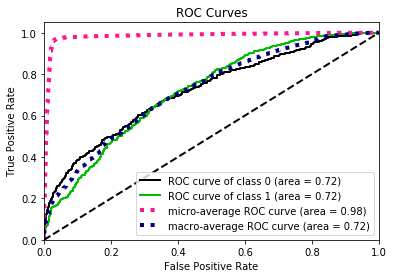

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [268]:
#y_pred_proba = model.predict_proba(X_test)
#accuracy_score(y_test, y_pred)

import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_roc_curve(drap["is_open"], new)
plt.show()

ga = pd.DataFrame()

ga["name"] = X.columns

ga["imp"] = model.feature_importance()
print(accuracy_score(y_test, y_pred))
pd.set_option("display.max_rows",None)

In [ ]:
ga.sort_values("imp",ascending=False)

In [271]:
ga.sort_values("imp",ascending=False)

,name,imp
32,first_sent_std,365
33,last_sent_std,365
74,average_stars_mean,359
75,average_stars_std,346
56,oldest_review,324
135,first_min_last_sent,316
110,elite_count_mean,296
39,useful_mean,296
121,Female Importance,292
134,friends/review,290


In [269]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X)

In [44]:
X.head()

,rating_std,rating_min,rating_sum,rating_mean,rating_max,diffs_std,diffs_min,diffs_sum,diffs_mean,diffs_max,...,Free Wi-Fi_chain_std,Takes Reservations_chain_std,Outdoor Seating_chain_std,Delivery_chain_std,Caters_chain_std,Bike Parking_chain_std,Noisy_chain_std,review_count_loc_chain_std,friends/review_chain_std,first_min_last_sent_chain_std
5323,1.224745,2.0,15.0,3.000000,5.0,527.630553,88.0,1956.0,489.000000,1255.0,...,0.0,0.0,0.000000,0.0,0.500000,0.000000,0.0,9.521905,0.325820,0.611263
5327,1.235168,1.0,42.0,3.230769,5.0,93.148423,24.0,1615.0,134.583333,349.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5326,1.834848,1.0,13.0,2.166667,5.0,313.783843,5.0,1263.0,252.600000,776.0,...,0.0,0.0,0.231149,0.0,0.136071,0.000000,0.0,9.905505,0.579594,1.154001
5325,0.995227,1.0,79.0,3.761905,5.0,137.698708,9.0,2685.0,134.250000,529.0,...,0.0,0.0,0.000000,0.0,0.000000,0.447214,0.0,6.633250,0.511210,0.770584
5324,1.114641,1.0,22.0,1.833333,4.0,152.274274,8.0,1929.0,175.363636,462.0,...,0.0,0.0,0.092848,0.0,0.159412,0.502169,0.0,12.647389,0.982259,1.070882


In [89]:
pd.DataFrame(shap_values[0:,:-1], columns = list(X.columns)).sum().to_frame().sort_values(0,ascending=False)


,0
days_std_chain_avg,1611.637224
days_std,1339.377914
diffs_max,1152.594965
oldest_review,1023.657339
diffs_sum,496.071660
useful_mean,171.015290
restaurant_density,66.274961
diffs_mean,-456.770338
days_mean,-742.349588
diffs_sum_chain_avg,-1610.956385


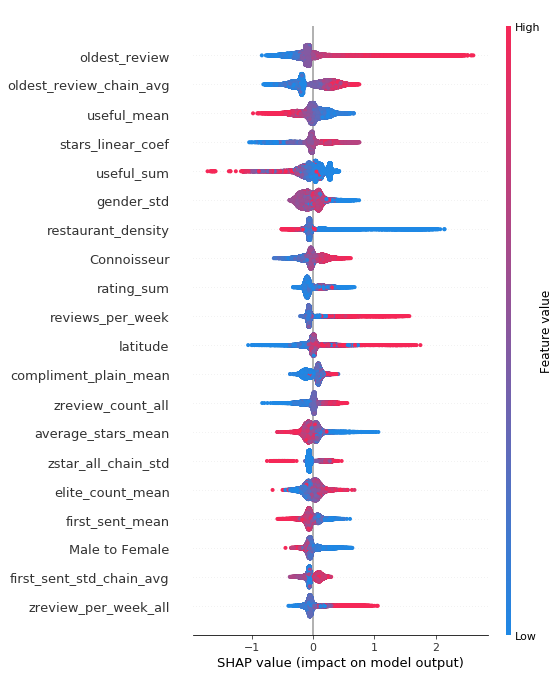

In [270]:
shap.summary_plot(shap_values, X)

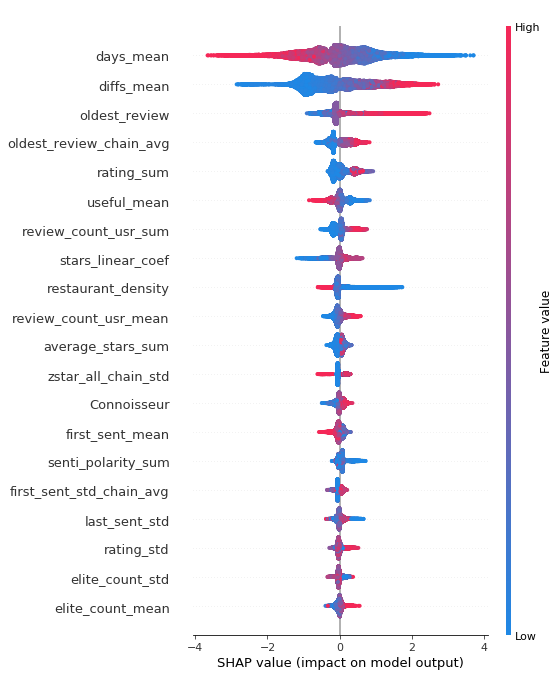

In [254]:
shap.summary_plot(shap_values, X)

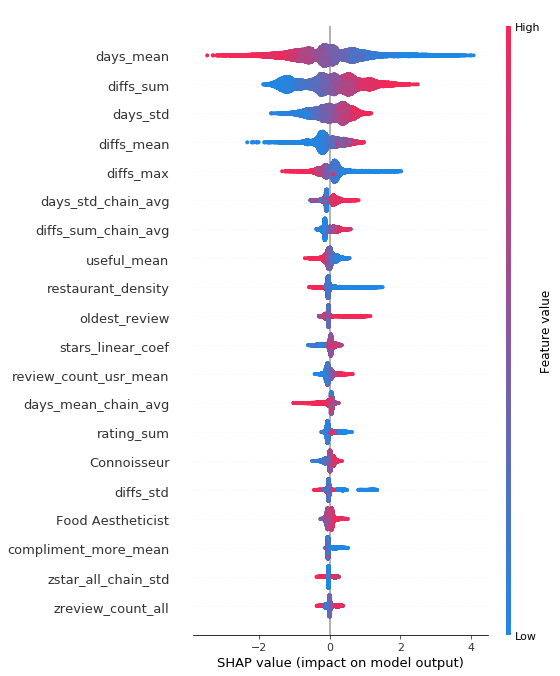

In [13]:
shap.summary_plot(shap_values, X)

In [ ]:
shap.dependence_plot(name, shap_values, X, display_features=X)

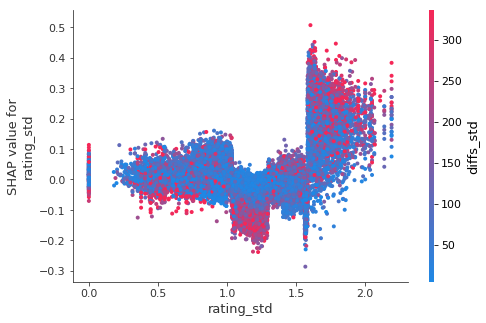

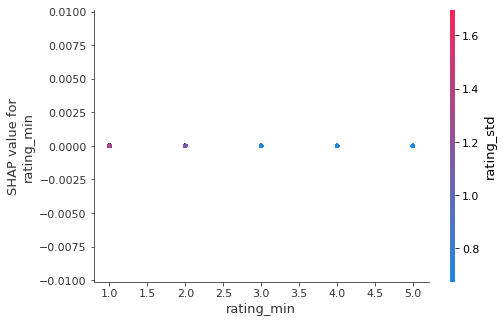

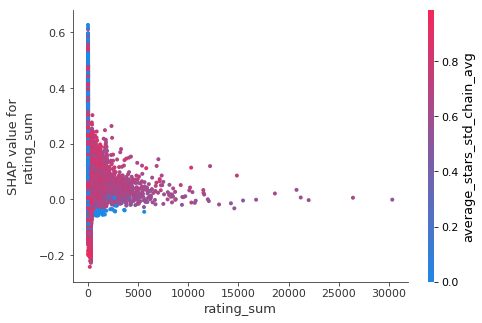

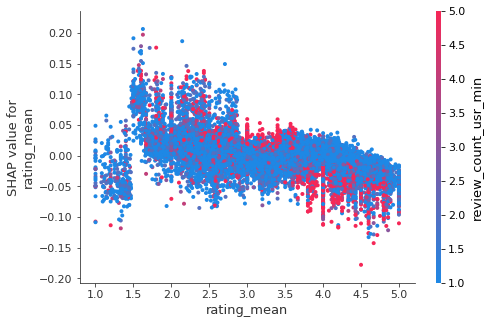

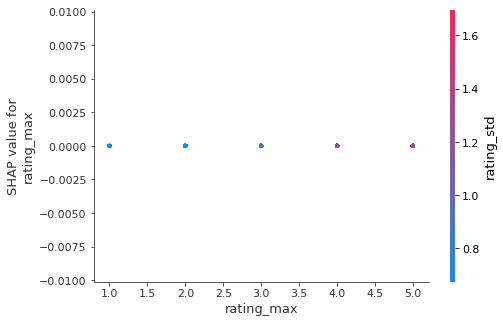

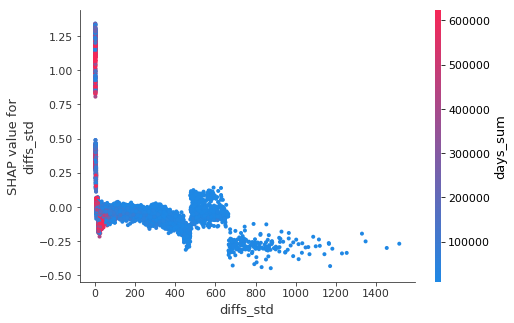

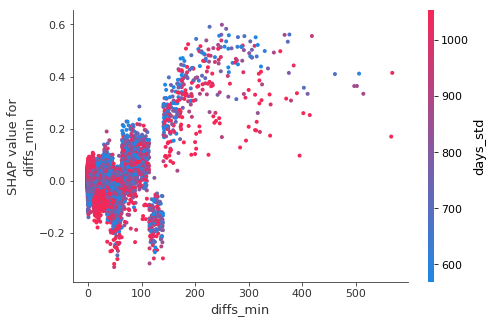

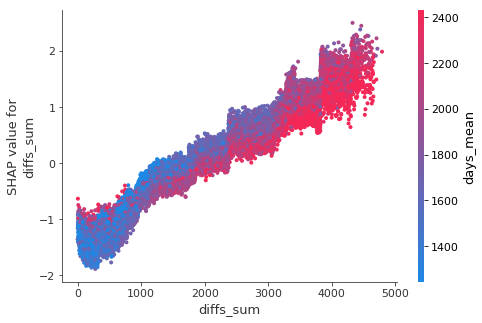

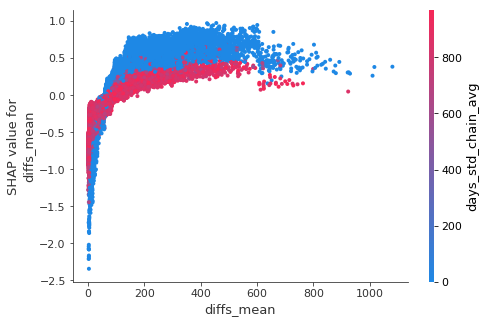

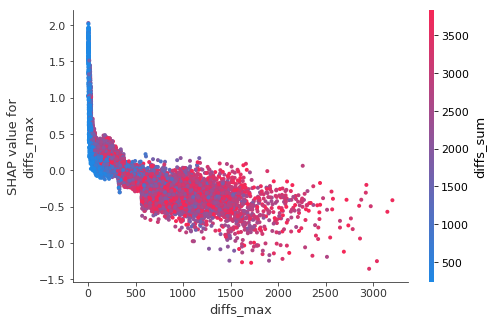

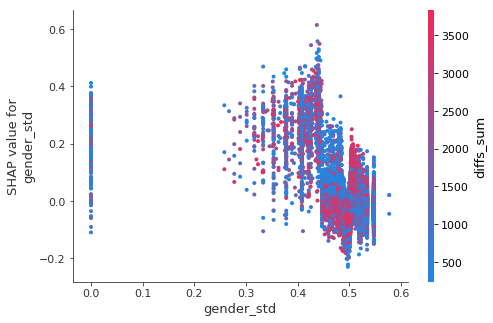

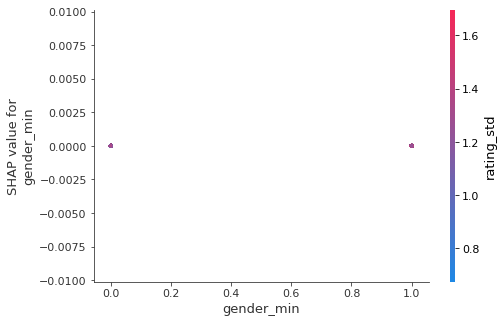

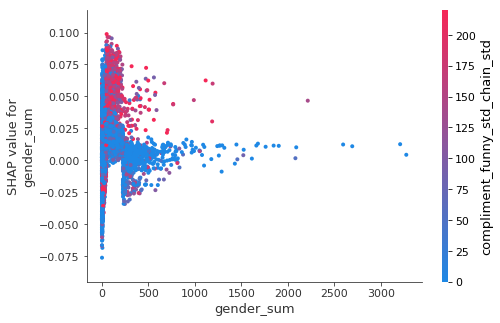

In [31]:
for name in X_train.iloc[:,:13].columns:
    shap.dependence_plot(name, shap_values, X, display_features=X)



In [274]:
import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=7, n_estimators=1000, learning_rate=0.05).fit(X_train,y_train)


In [275]:
import xgbfir

xgbfir.saveXgbFI(gbm,feature_names=list(X.columns), OutputXlsxFile='feats_inter_sans.xlsx') 

In [85]:
pd.DataFrame(shap_values[0:,:-1], columns = list(X.columns)).sum().to_frame().sort_values(0,ascending=False)



,0
days_std_chain_avg,1611.637224
days_std,1339.377914
diffs_max,1152.594965
oldest_review,1023.657339
diffs_sum,496.071660
useful_mean,171.015290
restaurant_density,66.274961
diffs_mean,-456.770338
days_mean,-742.349588
diffs_sum_chain_avg,-1610.956385


In [61]:
### You had to take abs volaue so wel done. 

abs_shap = pd.DataFrame(shap_values[0:,:-1], columns = list(X.columns)).abs().sum().to_frame().sort_values(0,ascending=False)

lit = []
for r in list(abs_shap.index.values[:10]):
    t = X.columns.get_loc(r)
    lit.append(t)
    print(t)

lit

X.head()

shap.force_plot(shap_values[:100,np.r_[10,30]], X.iloc[:100,np.r_[10,30]], link="logit")

In [84]:
shap.force_plot(shap_values[:100,:], X.iloc[:100,:], link="logit")

In [83]:
shap.force_plot(shap_values[100,:], X.iloc[100,:], link="logit")

In [ ]:
shap.force_plot(shap_values, X)

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/shap/plots.py:592: UserWarning: shap.force_plot is slow many thousands of rows, try subsampling your data.
  warnings.warn("shap.force_plot is slow many thousands of rows, try subsampling your data.")


In [ ]:
lgbm.fit(X_train, y_train, eval_set=[(X_train, y_train)],eval_metric='AUC',
        early_stopping_rounds=5)

y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)
accuracy_score(y_test, y_pred)



import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

ga = pd.DataFrame()

ga["name"] = X.columns

ga["imp"] = lgbm.feature_importances_
print(accuracy_score(y_test, y_pred))
pd.set_option("display.max_rows",None)

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:104: UserWarning: Found `early_stopping` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's auc: 0.754216
Training until validation scores don't improve for 50 rounds.
[2]	training's auc: 0.774986
[3]	training's auc: 0.780887
[4]	training's auc: 0.791206
[5]	training's auc: 0.803704
[6]	training's auc: 0.806146
[7]	training's auc: 0.808055
[8]	training's auc: 0.810488
[9]	training's auc: 0.812801
[10]	training's auc: 0.817025
[11]	training's auc: 0.818193
[12]	training's auc: 0.819614
[13]	training's auc: 0.824379
[14]	training's auc: 0.825665
[15]	training's auc: 0.828518
[16]	training's auc: 0.83052
[17]	training's auc: 0.833184
[18]	training's auc: 0.835004
[19]	training's auc: 0.837711
[20]	training's auc: 0.839446
[21]	training's auc: 0.841693
[22]	training's auc: 0.845827
[23]	training's auc: 0.848617
[24]	training's auc: 0.851357
[25]	training's auc: 0.854738
[26]	training's auc: 0.856883
[27]	training's auc: 0.858518
[28]	training's auc: 0.860441
[29]	training's auc: 0.862856
[30]	training's auc: 0.8649
[31]	training's auc: 0.866397
[32]	training's auc:

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


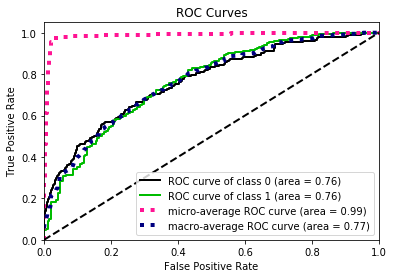

0.9705558613098514


In [359]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

train = 0.67
range_size = int(len(X)*train)
X_train, X_test, y_train, y_test = X.iloc[:range_size,:], X.iloc[range_size:,:], Y.iloc[:range_size], Y.iloc[range_size:]

# This is what I expect a human to get 
Y.sum()/(Y.count())

from lightgbm import LGBMClassifier


lgbm = LGBMClassifier(boosting_type='gbdt', objective='binary',
                       num_class=1,early_stopping = 50,
                       is_enable_sparse='true',tree_learner='data',num_leaves=31,num_iteration=10000,min_data_in_leaf=100,max_depth=14,
                       learning_rate=0.1, n_estimators=1000, max_bin=255, subsample_for_bin=500, 
                       min_split_gain=5, min_child_weight=5, min_child_samples=5, subsample=0.995, 
                       subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       reg_lambda=0, seed=0, nthread=-1, silent=True,)

lgbm.fit(X_train, y_train, eval_set=[(X_train, y_train)],eval_metric='AUC',
        early_stopping_rounds=5)

y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)
accuracy_score(y_test, y_pred)



import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

ga = pd.DataFrame()

ga["name"] = X.columns

ga["imp"] = lgbm.feature_importances_
print(accuracy_score(y_test, y_pred))
pd.set_option("display.max_rows",None)

In [349]:
accuracy_score(y_test, y_pred)

0.9297031354236157

In [360]:
ga.sort_values("imp",ascending=False)

,name,imp
118,days_mean,252
119,days_std,142
7,diffs_sum,107
8,diffs_mean,74
44,useful_mean,42
64,stars_linear_coef,41
125,Connoisseur,35
261,days_mean_chain_avg,34
262,days_std_chain_avg,30
5,diffs_std,29


In [368]:
shap_values = shap.TreeExplainer(model).shap_values(X)

Exception: Model type not yet supported by TreeExplainer: <class 'catboost.core.CatBoostClassifier'>

In [363]:
import shap

# load JS visualization code to notebook
shap.initjs() 

shap_values = lgbm.predict(X, pred_contribs=True)

# visualize the first prediction's explaination
shap.force_plot(shap_values[0,:], X.iloc[0,:])

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


TypeError: predict() got an unexpected keyword argument 'pred_contribs'

In [348]:
ga.sort_values("imp",ascending=False)

,name,imp
118,days_mean,220
119,days_std,133
7,diffs_sum,87
8,diffs_mean,62
125,Connoisseur,53
261,days_mean_chain_avg,47
44,useful_mean,47
64,stars_linear_coef,41
9,diffs_max,31
262,days_std_chain_avg,29


/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:104: UserWarning: Found `early_stopping` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's auc: 0.888298
Training until validation scores don't improve for 50 rounds.
[2]	training's auc: 0.898451
[3]	training's auc: 0.907781
[4]	training's auc: 0.912264
[5]	training's auc: 0.91412
[6]	training's auc: 0.91515
[7]	training's auc: 0.917894
[8]	training's auc: 0.919701
[9]	training's auc: 0.920493
[10]	training's auc: 0.922876
[11]	training's auc: 0.923903
[12]	training's auc: 0.925697
[13]	training's auc: 0.926121
[14]	training's auc: 0.927413
[15]	training's auc: 0.928462
[16]	training's auc: 0.929499
[17]	training's auc: 0.930444
[18]	training's auc: 0.93134
[19]	training's auc: 0.931998
[20]	training's auc: 0.932615
[21]	training's auc: 0.933894
[22]	training's auc: 0.934693
[23]	training's auc: 0.935925
[24]	training's auc: 0.936601
[25]	training's auc: 0.93736
[26]	training's auc: 0.93857
[27]	training's auc: 0.93935
[28]	training's auc: 0.940207
[29]	training's auc: 0.940998
[30]	training's auc: 0.94152
[31]	training's auc: 0.942378
[32]	training's auc: 0.9

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


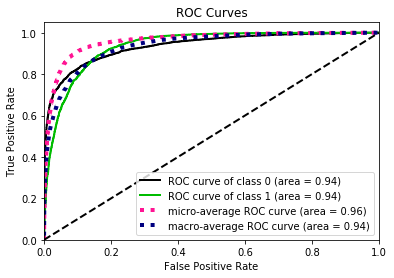

0.9052926606700561


In [200]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

# This is what I expect a human to get 
Y.sum()/(Y.count())

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type='gbdt', objective='binary',
                       num_class=1,early_stopping = 50,
                       is_enable_sparse='true',tree_learner='data',num_leaves=31,num_iteration=10000,min_data_in_leaf=100,max_depth=14,
                       learning_rate=0.1, n_estimators=1000, max_bin=255, subsample_for_bin=500, 
                       min_split_gain=5, min_child_weight=5, min_child_samples=5, subsample=0.995, 
                       subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       reg_lambda=0, seed=0, nthread=-1, silent=True,)

lgbm.fit(X_train, y_train, eval_set=[(X_train, y_train)],eval_metric='AUC',
        early_stopping_rounds=5)

y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)
accuracy_score(y_test, y_pred)



import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

ga = pd.DataFrame()

ga["name"] = X.columns

ga["imp"] = lgbm.feature_importances_
print(accuracy_score(y_test, y_pred))
pd.set_option("display.max_rows",None)

In [195]:
accuracy_score(y_test, y_pred)

0.8236866119150046

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/lightgbm/engine.py:104: UserWarning: Found `early_stopping` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's auc: 0.882534
Training until validation scores don't improve for 50 rounds.
[2]	training's auc: 0.894094
[3]	training's auc: 0.898894
[4]	training's auc: 0.902307
[5]	training's auc: 0.903327
[6]	training's auc: 0.905976
[7]	training's auc: 0.908149
[8]	training's auc: 0.909991
[9]	training's auc: 0.911715
[10]	training's auc: 0.912686
[11]	training's auc: 0.914835
[12]	training's auc: 0.916285
[13]	training's auc: 0.917519
[14]	training's auc: 0.918646
[15]	training's auc: 0.919958
[16]	training's auc: 0.921151
[17]	training's auc: 0.922174
[18]	training's auc: 0.922863
[19]	training's auc: 0.923779
[20]	training's auc: 0.924697
[21]	training's auc: 0.925918
[22]	training's auc: 0.926888
[23]	training's auc: 0.927459
[24]	training's auc: 0.928288
[25]	training's auc: 0.929247
[26]	training's auc: 0.929884
[27]	training's auc: 0.931003
[28]	training's auc: 0.931879
[29]	training's auc: 0.932641
[30]	training's auc: 0.933569
[31]	training's auc: 0.934495
[32]	training's a

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


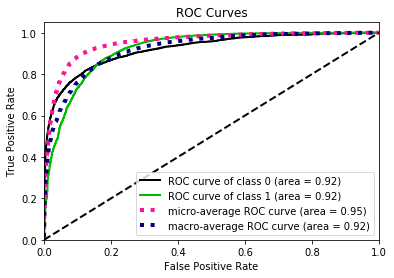

,name,imp
113,days_mean,264
114,days_std,211
56,oldest_review,138
21,review_count_usr_min,52
39,useful_mean,43
23,review_count_usr_mean,40
59,stars_linear_coef,34
112,days_sum,34
74,average_stars_mean,34
195,oldest_review_chain_avg,34


In [190]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

# This is what I expect a human to get 
Y.sum()/(Y.count())

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type='gbdt', objective='binary',
                       num_class=1,early_stopping = 50,
                       is_enable_sparse='true',tree_learner='data',num_leaves=31,num_iteration=10000,min_data_in_leaf=100,max_depth=14,
                       learning_rate=0.1, n_estimators=1000, max_bin=255, subsample_for_bin=500, 
                       min_split_gain=5, min_child_weight=5, min_child_samples=5, subsample=0.995, 
                       subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       reg_lambda=0, seed=0, nthread=-1, silent=True,)

lgbm.fit(X_train, y_train, eval_set=[(X_train, y_train)],eval_metric='AUC',
        early_stopping_rounds=5)

y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)
accuracy_score(y_test, y_pred)



import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

ga = pd.DataFrame()

ga["name"] = X.columns

ga["imp"] = lgbm.feature_importances_

pd.set_option("display.max_rows",None)


ga.sort_values("imp",ascending=False)

In [201]:
ga.sort_values("imp",ascending=False)

,name,imp
118,days_mean,306
7,diffs_sum,233
119,days_std,150
8,diffs_mean,102
28,review_count_usr_mean,42
9,diffs_max,35
133,Convenience Level,33
26,review_count_usr_min,31
142,friends/review,30
262,days_std_chain_avg,27


In [180]:
ga.sort_values("imp",ascending=False)

,name,imp
111,elite_count_std,100
56,oldest_review,99
39,useful_mean,95
75,average_stars_std,82
46,cool_std,61
74,average_stars_mean,41
30,first_sent_mean,40
117,Connoisseur,39
118,Food Aestheticist,39
192,oldest_review_chain_avg,37


In [ ]:
from catboost import Pool, CatBoostClassifier, cv, CatboostIpythonWidget
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]

model = CatBoostClassifier(iterations=1200, learning_rate=0.02, depth=7, loss_function='Logloss', eval_metric='AUC', random_seed=99, od_type='Iter', od_wait=100) 
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
accuracy_score(y_test, y_pred)

/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


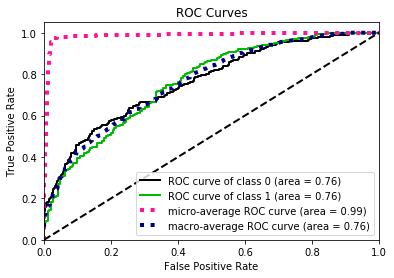

In [367]:
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_prob = model.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob)
plt.show()

In [9]:
import shap

# load JS visualization code to notebook
shap.initjs() 

shap_values = lgbm.predict(X, pred_contribs=True)

# visualize the first prediction's explaination
shap.force_plot(shap_values[0,:], X.iloc[0,:])


ModuleNotFoundError: No module named 'shap.explainers'

In [214]:
### Here is some PDP box interactions. 

,Average Customer Network,Connoisseur,Female,Female Importance,First Visit,Food Aestheticist,Foreign,Foreign Importance,Foreign to Local,High Network,Local,Low Network,Male,Male to Female,Number of Reviewers,Patrons,Total Network,Visual Importance,review_count,rating,price,categories,oldest_review,std_of_stars,median_of_stars,stars_linear_coef,reactions_per_week,reviews_per_week,is_chain,M/F,first_sent_mean,last_sent_mean,first_sent_std,last_sent_std,first_sent_sum,last_sent_sum,friend_count_mean,friend_countstd,friend_count_sum,friend_count_max,friend_count_min,review_count_mean,review_countstd,review_count_sum,review_count_max,review_count_min,photo_count_mean,photo_countstd,photo_count_sum,photo_count_max,photo_count_min,rating_mean,ratingstd,rating_sum,rating_max,rating_min,senti_polarity_mean,senti_polaritystd,senti_polarity_sum,senti_polarity_max,senti_polarity_min,gender_mean,genderstd,gender_sum,gender_max,gender_min,friends/review,first_min_last_sent
0,109.340541,3.308108,3.161616,1.010222,3.182825,3.287879,3.195804,5.43125,3.404762,3.297297,3.202381,3.097297,3.238372,0.868687,370,3.210526,40456,1.174374,381,3.0,$$,Pizza;Breweries;American (New),572.0,1.350541,3.0,0.000059,NaN,0.664336,True,0.465789,0.190637,0.224265,0.218531,0.268974,36.221015,42.610404,106.463158,277.932911,40456,4193,0,125.078947,280.484455,47530,3753,1,203.715328,525.005584,55818.0,4254.0,1.0,3.184211,1.352322,1210.0,5.0,1.0,0.207451,0.245309,78.831419,1.0,-0.9,0.465789,0.499486,177,1,0,43.705882,-1.115832


In [ ]:
### For me I obviously just want the fastest one, there is no reason or me to squeeze erofrmance out of this. 